In [108]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc,RocCurveDisplay
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [109]:

def predictClass(score):
    if(score==0):
        return "Sane"
    elif(score==1):
        return "Mild"
    elif(score==2):
        return "Serious"
        

In [110]:
stock_data = pd.read_csv('ALZ.csv')
stock_data=stock_data.drop(['MMSE2'],axis=1)


stock_data.dropna(inplace=True)


y_bin = label_binarize(y, classes=[0, 1, 2])

X=stock_data.drop(['Dx'], axis=1)
y=stock_data['Dx']

train_size = int(len(stock_data)*0.7)

train=stock_data.iloc[:train_size]

In [111]:
X,y

(     Sex  Age   Edu  MoCA
 0      1   66  12.0    20
 1      1   60  12.0    22
 2      1   60   9.0    23
 3      1   79  11.0    20
 4      1   78   0.0     2
 ..   ...  ...   ...   ...
 298    0   56  18.0    22
 299    0   65   6.0    22
 300    0   80  11.0    16
 301    1   51  12.0    20
 302    1   86   0.5     7
 
 [303 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      2
       ..
 298    1
 299    0
 300    2
 301    1
 302    2
 Name: Dx, Length: 303, dtype: int64)

In [112]:
X_train, y_train = train.drop(['Dx'],axis=1), train['Dx']
test=stock_data.iloc[train_size:]
X_test, y_test = test.drop(['Dx'],axis=1), test['Dx']
train_data=X_train.join(y_train)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
train_data

,Sex,Age,Edu,MoCA,Dx
0,1,66,12.0,20,1
1,1,60,12.0,22,1
2,1,60,9.0,23,1
3,1,79,11.0,20,1
4,1,78,0.0,2,2
...,...,...,...,...,...
207,0,82,6.0,14,1
208,1,76,6.0,11,2
209,1,60,6.0,20,1
210,0,80,12.0,8,2


In [113]:
model_accuracies = {}

# Models initialization
models = {
    'RandomForest': RandomForestClassifier(n_estimators=500, random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True, random_state=0),
   
}

In [114]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    model_accuracies[model_name] = accuracy * 100
    predicted_class = model.predict(new_data_point)
    print(f"Accuracy of {model_name}:", accuracy * 100)
    print(f"Predicted class using {model_name}:", predictClass(predicted_class[0]))

Accuracy of RandomForest: 78.02197802197803
Predicted class using RandomForest: Mild
Accuracy of KNN: 80.21978021978022
Predicted class using KNN: Mild
Accuracy of SVM: 79.12087912087912
Predicted class using SVM: Sane


z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Edu'}>,
        <Axes: title={'center': 'MoCA'}>],
       [<Axes: title={'center': 'Dx'}>, <Axes: >]], dtype=object)

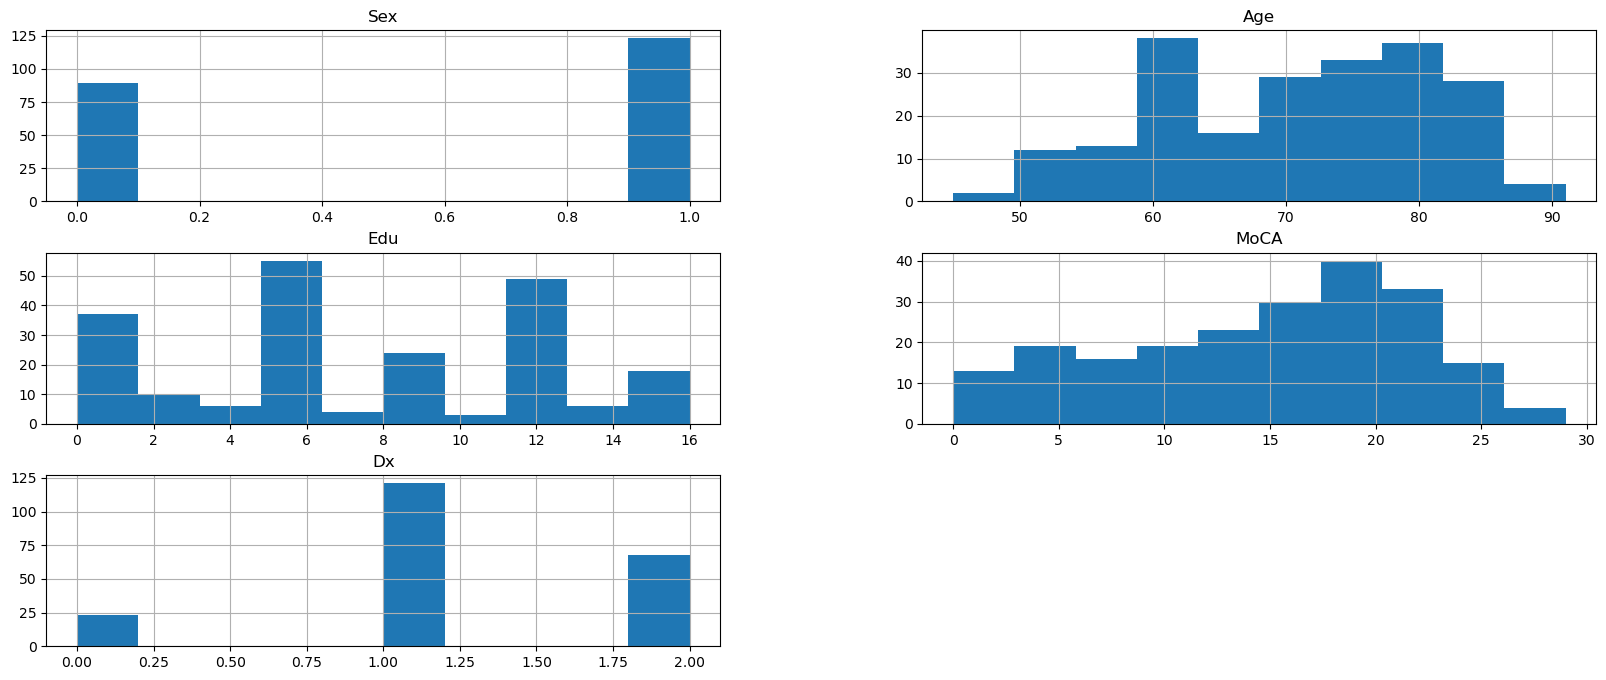

In [115]:
train_data.hist(figsize=(20,8))


<Axes: >

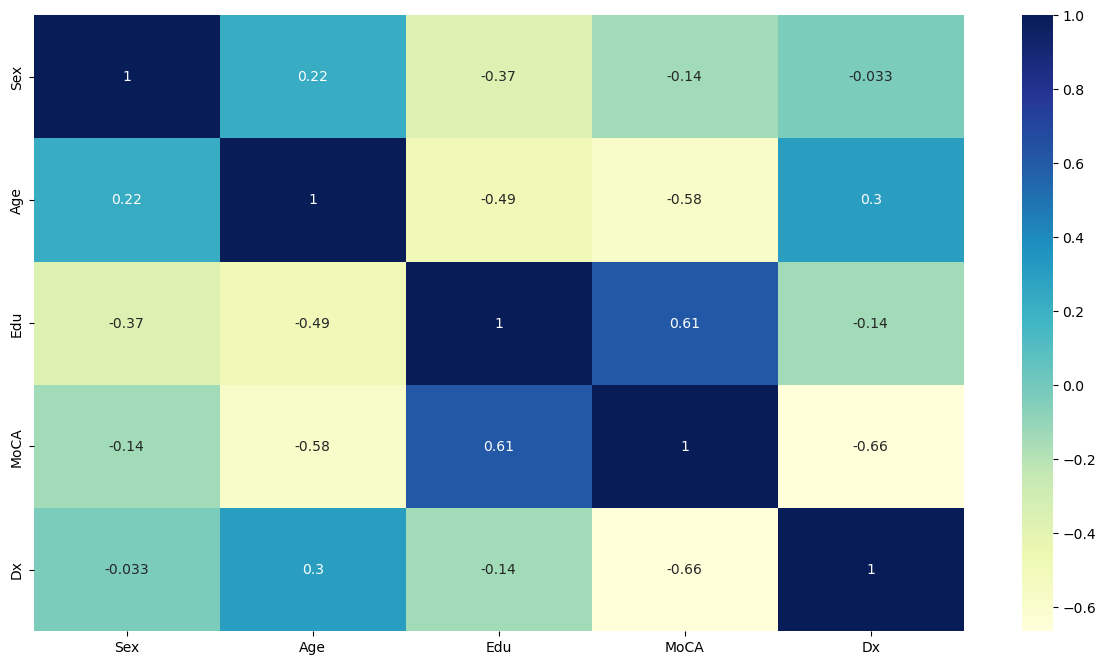

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [117]:
train_data.corr()

,Sex,Age,Edu,MoCA,Dx
Sex,1.000000,0.221557,-0.366660,-0.139674,-0.032513
Age,0.221557,1.000000,-0.493290,-0.578652,0.302726
Edu,-0.366660,-0.493290,1.000000,0.610128,-0.143354
MoCA,-0.139674,-0.578652,0.610128,1.000000,-0.664626
Dx,-0.032513,0.302726,-0.143354,-0.664626,1.000000


In [118]:
random_forest_model = RandomForestClassifier(n_estimators=500, random_state=0)
random_forest_model.fit(X_train, y_train)

# Evaluate the model
accuracy = random_forest_model.score(X_test, y_test)
print("Accuracy of RandomForestClassifier:", accuracy * 100)

# Predict the class for a new data point
new_data_point = np.array([1, 66, 12, 30]).reshape(1, -1)
predicted_class = random_forest_model.predict(new_data_point)
print("Predicted class using RandomForestClassifier:", predictClass(predicted_class))

Accuracy of RandomForestClassifier: 78.02197802197803
Predicted class using RandomForestClassifier: Mild


z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

accuracy = knn_model.score(X_test, y_test)
print("Accuracy of KNN:", accuracy * 100)

new_data_point = np.array([1, 66, 12, 20]).reshape(1, -1)
predicted_class = knn_model.predict(new_data_point)
print("Predicted class using KNN:", predictClass(predicted_class))

Accuracy of KNN: 80.21978021978022
Predicted class using KNN: Mild


z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [120]:
svm_model = SVC(kernel='linear', random_state=0)  # You can try different kernels like 'rbf', 'poly'
svm_model.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_model.score(X_test, y_test)
print("Accuracy of SVM model:", accuracy * 100)

# Predict the class for a new data point
new_data_point = np.array([1, 66, 12, 30]).reshape(1, -1)
predicted_class = svm_model.predict(new_data_point)
print("Predicted class using SVM:", predictClass(predicted_class[0]))

Accuracy of SVM model: 79.12087912087912
Predicted class using SVM: Sane


z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [121]:
# Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=0)
gradient_boosting_model.fit(X_train, y_train)
accuracy = gradient_boosting_model.score(X_test, y_test)
print("Accuracy of Gradient Boosting Classifier:", accuracy * 100)
predicted_class = gradient_boosting_model.predict(new_data_point)
print("Predicted class using Gradient Boosting Classifier:", predictClass(predicted_class[0]))


Accuracy of Gradient Boosting Classifier: 75.82417582417582
Predicted class using Gradient Boosting Classifier: Sane


z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [122]:
# Logistic Regression
logistic_regression_model = LogisticRegression(random_state=0)
logistic_regression_model.fit(X_train, y_train)
accuracy = logistic_regression_model.score(X_test, y_test)
print("Accuracy of Logistic Regression:", accuracy * 100)
predicted_class = logistic_regression_model.predict(new_data_point)
print("Predicted class using Logistic Regression:", predictClass(predicted_class[0]))


Accuracy of Logistic Regression: 78.02197802197803
Predicted class using Logistic Regression: Sane


z:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  args=(X, target, sample_weight, l2_reg_strength, n_threads),
z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [123]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train, y_train)
accuracy = decision_tree_model.score(X_test, y_test)
print("Accuracy of Decision Tree Classifier:", accuracy * 100)
predicted_class = decision_tree_model.predict(new_data_point)
print("Predicted class using Decision Tree Classifier:", predictClass(predicted_class[0]))

Accuracy of Decision Tree Classifier: 72.52747252747253
Predicted class using Decision Tree Classifier: Sane


z:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [127]:
# Function to calculate AUC for different thresholds
def calculate_auc_scores(model, X_test, y_test):
    thresholds = np.arange(0.1, 1.1, 0.1)
    auc_scores = []
    for threshold in thresholds:
        predicted_probabilities = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, predicted_probabilities, multi_class='ovr')
        auc_scores.append(auc)
    return thresholds, auc_scores

z:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  args=(X, target, sample_weight, l2_reg_strength, n_threads),


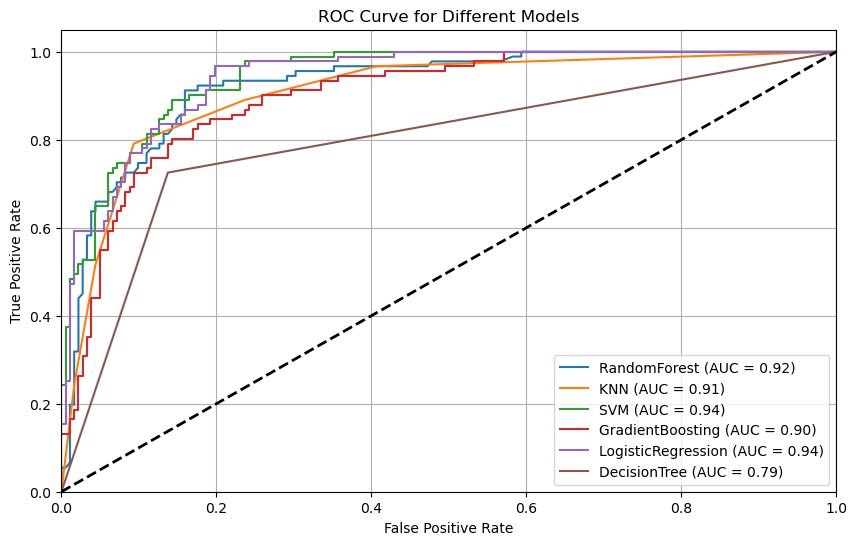

In [154]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])


# Models initialization
models = {
    'RandomForest': RandomForestClassifier(n_estimators=500, random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True, random_state=0),
    'GradientBoosting': GradientBoostingClassifier(random_state=0),
    'LogisticRegression': LogisticRegression(random_state=0),
    'DecisionTree': DecisionTreeClassifier(random_state=0)
}

# Fit models and calculate AUC scores
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predicted_probabilities = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probabilities[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), predicted_probabilities.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.plot(fpr["micro"], tpr["micro"], label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [150]:
# Function to calculate macro-average F1 scores for different thresholds
def calculate_macro_f1_scores(model, X_test, y_test):
    thresholds = np.arange(0.1, 1.1, 0.1)
    f1_scores = []
    predicted_probabilities = model.predict_proba(X_test)
    for threshold in thresholds:
        predicted_classes = (predicted_probabilities >= threshold).astype(int)
        macro_f1 = f1_score(y_test_bin, predicted_classes, average='macro')
        f1_scores.append(macro_f1)
    return thresholds, f1_scores

z:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  args=(X, target, sample_weight, l2_reg_strength, n_threads),


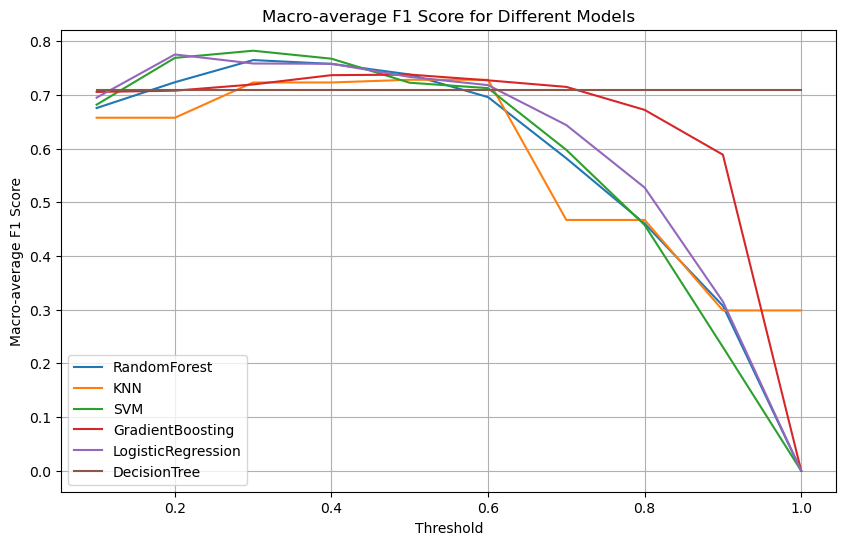

In [153]:
# Plotting macro-average F1 score graph for each model
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    thresholds, f1_scores = calculate_macro_f1_scores(model, X_test, y_test)
    plt.plot(thresholds, f1_scores, label=f'{model_name}')

plt.xlabel('Threshold')
plt.ylabel('Macro-average F1 Score')
plt.title('Macro-average F1 Score for Different Models')
plt.legend()
plt.grid(True)
plt.show()